# Modelos de Regresión Lineal
## Modelo con datos sumulados
* y = a + b * x
* x: 100 valores distribuidos segun distribucion noral N(1.5,2.5)
* Y = 5 + 1.9 * x + e
* e estara distribuido segun una N(0,0.8)

In [91]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [92]:
x = 1.5 + 2.5 * np.random.randn(100)

In [93]:
res = 0 + 0.8 * np.random.randn(100)

In [94]:
y_pred = 5 + 1.9 * x

In [95]:
y_act = 5 + 1.9 * x + res

In [96]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [97]:
data = pd.DataFrame(
    {
     "x" : x_list,
     "y_actual" : y_act_list,
     "y_prediction" : y_pred_list
    }
)

In [98]:
data.head()

,x,y_actual,y_prediction
0,3.463219,11.652719,11.580116
1,-0.973170,2.424153,3.150978
2,2.115695,7.828109,9.019821
3,5.599498,14.623037,15.639046
4,1.820724,8.882540,8.459376


In [99]:
import matplotlib.pyplot as plt

In [100]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

Text(0.5, 1.0, 'Actual vs Prediccion')

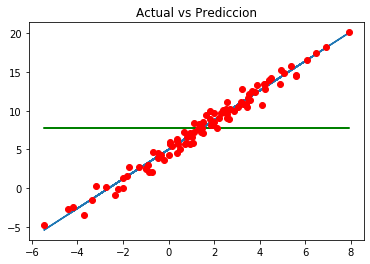

In [101]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_mean,"g")
plt.plot(x,y_act,"ro")
plt.title("Actual vs Prediccion")

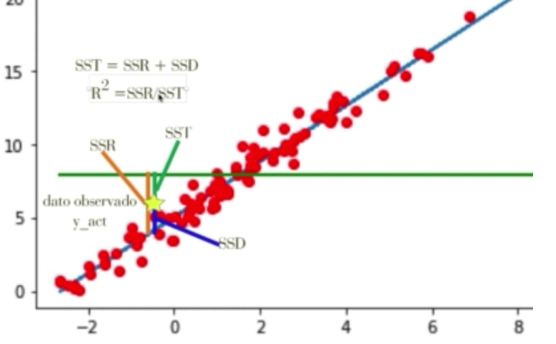

In [102]:
Image(filename="../imgs/regresion_lineal.png")

In [103]:
data["SSR"] = (data["y_prediction"] - np.mean(y_act))**2 
data["SSD"] = (data["y_prediction"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [104]:
data.head()

,x,y_actual,y_prediction,SSR,SSD,SST
0,3.463219,11.652719,11.580116,14.650529,0.005271,15.211589
1,-0.973170,2.424153,3.150978,21.174144,0.528275,28.391446
2,2.115695,7.828109,9.019821,1.606065,1.420177,0.005714
3,5.599498,14.623037,15.639046,62.197369,1.032274,47.204074
4,1.820724,8.882540,8.459376,0.499652,0.179067,1.276955


In [105]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [106]:
SSR

2399.3809277510836

In [107]:
SSD

57.14690950532086

In [108]:
SST

2481.9174786495273

In [109]:
SSD+SSR

2456.5278372564044

In [110]:
R2 = SSR / SST

In [111]:
R2

0.9667448448191944

(array([59., 16.,  9.,  7.,  5.,  2.,  1.,  0.,  0.,  1.]),
 array([5.80449889e-05, 4.18435303e-01, 8.36812561e-01, 1.25518982e+00,
        1.67356708e+00, 2.09194433e+00, 2.51032159e+00, 2.92869885e+00,
        3.34707611e+00, 3.76545337e+00, 4.18383062e+00]),
 <a list of 10 Patch objects>)

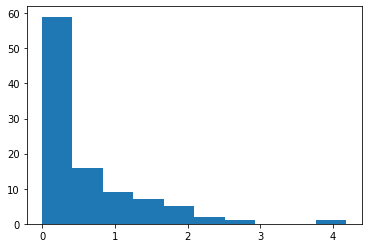

In [112]:
plt.hist(data["SSD"])

(array([ 3.,  5., 12., 19., 21., 15.,  9., 12.,  3.,  1.]),
 array([-1.69420802, -1.32024308, -0.94627813, -0.57231319, -0.19834824,
         0.1756167 ,  0.54958165,  0.92354659,  1.29751154,  1.67147648,
         2.04544143]),
 <a list of 10 Patch objects>)

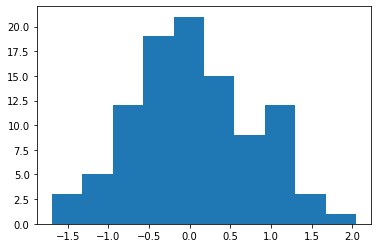

In [113]:
plt.hist(data["y_prediction"] - data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b * x
* b = suma de cuadrados 
* a = y_m  + b * x_m

In [114]:
x_mean =  np.mean(data["x"])
y_mean =  np.mean(data["y_actual"])
x_mean, y_mean

(1.4627069448169374, 7.75251508802026)

In [115]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"]-y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [116]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [117]:
alpha = y_mean - beta * x_mean

In [118]:
alpha,beta

(4.958585232925967, 1.910109106266644)

El modelo lineal obtenido por regresion es : y = 4.892594892535145 + 1.9472056395351642 * x

In [119]:
data["y_model"] = alpha + beta * data["x"]

In [120]:
data.head()

,x,y_actual,y_prediction,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.463219,11.652719,11.580116,14.650529,0.005271,15.211589,7.802405,4.002048,11.573711
1,-0.973170,2.424153,3.150978,21.174144,0.528275,28.391446,12.979232,5.933494,3.099725
2,2.115695,7.828109,9.019821,1.606065,1.420177,0.005714,0.049362,0.426394,8.999794
3,5.599498,14.623037,15.639046,62.197369,1.032274,47.204074,28.421914,17.113039,15.654237
4,1.820724,8.882540,8.459376,0.499652,0.179067,1.276955,0.404568,0.128176,8.436367


In [121]:
SSR_ = sum((data["y_model"] - np.mean(y_act))**2) 
SSD_ = sum((data["y_model"] - data["y_actual"])**2)
SST_ = sum((data["y_actual"] - np.mean(y_act))**2)

In [122]:
SSR_,SSD_,SST_

(2424.9093958498825, 57.00808279964467, 2481.9174786495273)

In [123]:
R2_ = SSR_ / SST_

In [124]:
R2_

0.9770306292251649

Text(0.5, 1.0, 'Actual vs Prediccion')

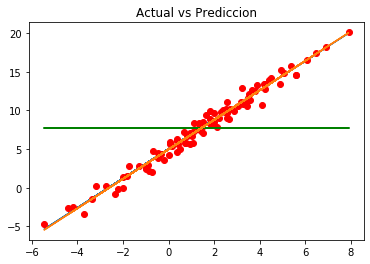

In [131]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediction"])
plt.plot(data["x"],data["y_actual"],"ro")
plt.plot(data["x"],y_mean,"g")
plt.plot(data["x"],data["y_model"])
plt.title("Actual vs Prediccion")

Text(0.5, 1.0, 'Actual vs Prediccion')

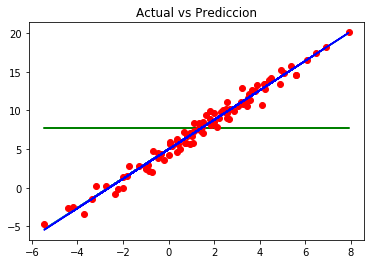

In [127]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_mean,"g")
plt.plot(x,y_act,"ro")
plt.plot(x,data["y_model"],"b")
plt.title("Actual vs Prediccion")

## Error estádar de los residuos (RSE)

In [132]:
RSE = np.sqrt(SSD_/len(data)-2)
RSE

D:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan